In [4]:
#!/usr/bin/env python
# coding: utf-8
# Author: Nelson Fernandez, Renault Research
# nelson.fernandez-pinto@renault.com

import sys,os
sys.path.append(os.getcwd())

# Imports
from dataset import *
from architectures import *
#from functions import *
from losses import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
%matplotlib inline

import torch
import torch.nn.functional as F
from torch.optim import Adam
from torch.autograd import Variable
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(7)


# Generate dataset
me = MazeExplorer(maze_size=(64,64), nbr_instances=30, 
                  difficulty='easy', nbr_trajectories=2,
                  alpha=17)

# Show deopping percentages
me.get_dopping_percentage()  # point level
me.get_dopping_percentage_trajectories() # trajectory level

# Create CNN model
net = ConvNet().to(device)
print('CNN created...')


# Get set of train/test INDEXES (hacking SKlean train_test_split)
x = np.arange(0, me.len())
train_indexes, test_indexes, _, _ = train_test_split(x, x, 
                                                    test_size=0.33, 
                                                    random_state=7)


# Wrap transforming function to dataset object
t_me = TransformedDataset(me, xy_transform=xy_transform)

# Get training/test subsets
train_me = Subset(t_me, indices=train_indexes)
test_me = Subset(t_me, indices=test_indexes)

# Configure dataloaders
batch_size = 1
num_workers = 4

trainloader = DataLoader(train_me, shuffle=True, 
                          batch_size=batch_size, 
                          num_workers=num_workers, 
                          pin_memory=True)


testloader = DataLoader(test_me, shuffle=True, 
                         batch_size=batch_size, 
                         num_workers=1,
                         pin_memory=True)

print('Train test data loaders created...')

# Init losses
rmse = RMSELoss()
graphic_loss = GraphicLoss()
road_loss = RoadLoss(k1=0.1)

# Set optimizer (Adam)
optimizer = Adam(net.parameters(), lr=1e-3)
epochs = 200
print('Losses and optimizer created...')




100%|██████████| 30/30 [00:00<00:00, 1066.55it/s]

Creating MazeExplorer dataset of difficulty easy
Using Prims generator
Using shortest path solver



 18%|█▊        | 22/120 [00:00<00:00, 212.59it/s]

Dataset generated... 120 available instances


100%|██████████| 120/120 [00:00<00:00, 594.73it/s]

Estimated dopping percentage (points) =  0.063


Estimated dopping percentage (trajectories)=  0.833
CNN created...
Train test data loaders created...
Losses and optimizer created...


Init training loop...


/anaconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Train Epoch: 1 [79/80 (99%)] EnvLoss: 0.035914  RMSELoss: 24.154339 TotalLoss: 24.190258


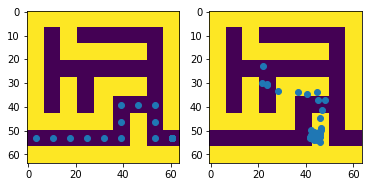

Train Epoch: 2 [79/80 (99%)] EnvLoss: 0.020365  RMSELoss: 19.372227 TotalLoss: 19.392588


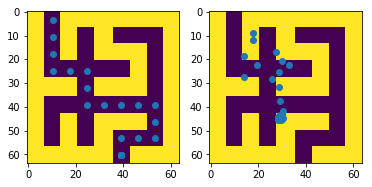

Train Epoch: 3 [79/80 (99%)] EnvLoss: 0.020599  RMSELoss: 17.148335 TotalLoss: 17.168934


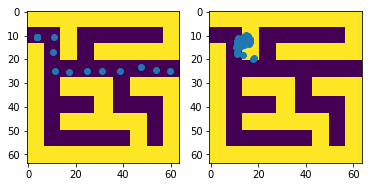

Train Epoch: 4 [79/80 (99%)] EnvLoss: 0.025087  RMSELoss: 15.217215 TotalLoss: 15.242302


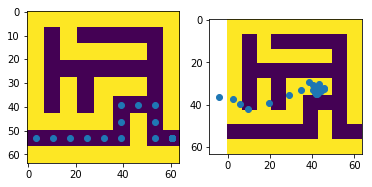

Train Epoch: 5 [79/80 (99%)] EnvLoss: 0.024925  RMSELoss: 12.419840 TotalLoss: 12.444765


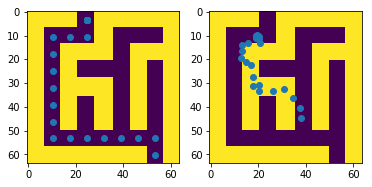

Train Epoch: 6 [79/80 (99%)] EnvLoss: 0.024228  RMSELoss: 12.406348 TotalLoss: 12.430576


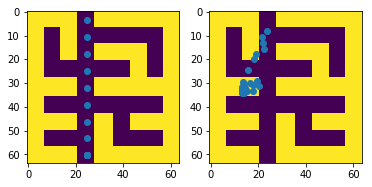

Train Epoch: 7 [79/80 (99%)] EnvLoss: 0.020440  RMSELoss: 10.275003 TotalLoss: 10.295442


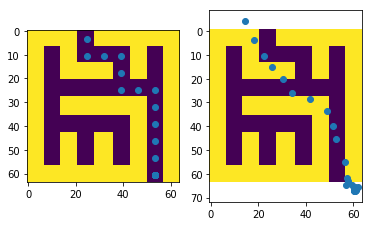

Train Epoch: 8 [79/80 (99%)] EnvLoss: 0.034161  RMSELoss: 9.934542 TotalLoss: 9.968702


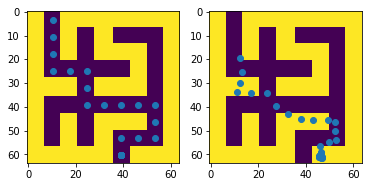

Train Epoch: 9 [79/80 (99%)] EnvLoss: 0.031176  RMSELoss: 9.384741 TotalLoss: 9.415915


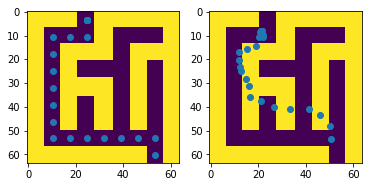

Train Epoch: 10 [79/80 (99%)] EnvLoss: 0.031332  RMSELoss: 9.216028 TotalLoss: 9.247360


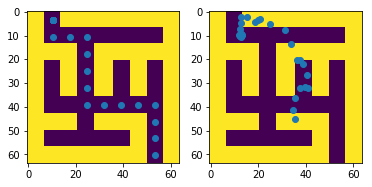

Train Epoch: 11 [79/80 (99%)] EnvLoss: 0.027433  RMSELoss: 9.225599 TotalLoss: 9.253032


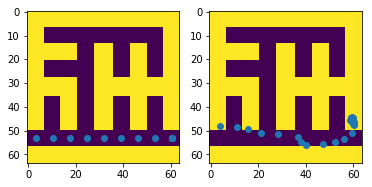

Train Epoch: 12 [79/80 (99%)] EnvLoss: 0.034902  RMSELoss: 8.682269 TotalLoss: 8.717171


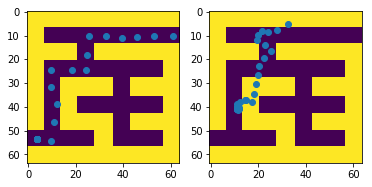

Train Epoch: 13 [79/80 (99%)] EnvLoss: 0.023592  RMSELoss: 8.340677 TotalLoss: 8.364267


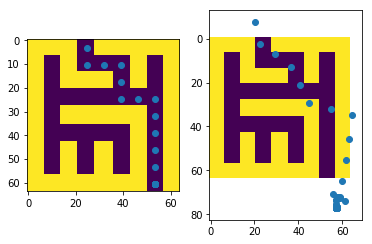

Train Epoch: 14 [79/80 (99%)] EnvLoss: 0.031918  RMSELoss: 7.506560 TotalLoss: 7.538481


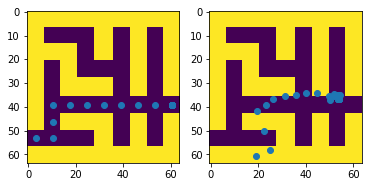

Train Epoch: 15 [79/80 (99%)] EnvLoss: 0.036005  RMSELoss: 7.798939 TotalLoss: 7.834944


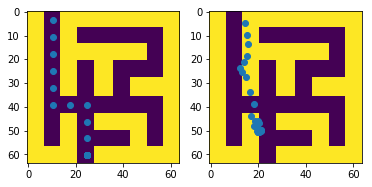

Train Epoch: 16 [79/80 (99%)] EnvLoss: 0.026257  RMSELoss: 7.443565 TotalLoss: 7.469823


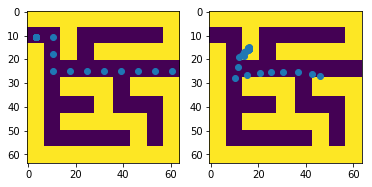

Train Epoch: 17 [79/80 (99%)] EnvLoss: 0.030945  RMSELoss: 6.826191 TotalLoss: 6.857137


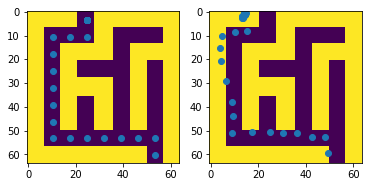

Train Epoch: 18 [79/80 (99%)] EnvLoss: 0.022533  RMSELoss: 6.965665 TotalLoss: 6.988197


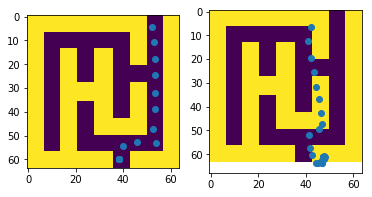

Train Epoch: 19 [79/80 (99%)] EnvLoss: 0.047336  RMSELoss: 7.604311 TotalLoss: 7.651649


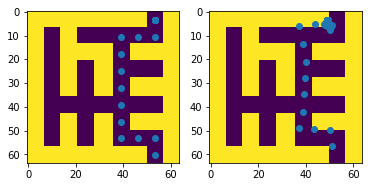

Train Epoch: 20 [79/80 (99%)] EnvLoss: 0.032671  RMSELoss: 6.742926 TotalLoss: 6.775598


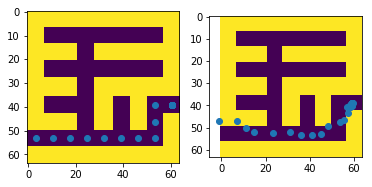

Train Epoch: 21 [79/80 (99%)] EnvLoss: 0.023412  RMSELoss: 6.801401 TotalLoss: 6.824814


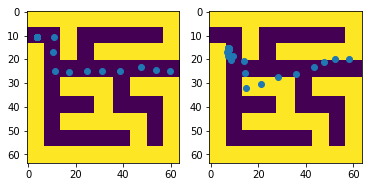

Train Epoch: 22 [79/80 (99%)] EnvLoss: 0.014764  RMSELoss: 6.400366 TotalLoss: 6.415128


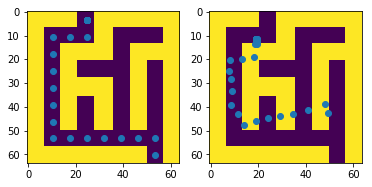

Train Epoch: 23 [79/80 (99%)] EnvLoss: 0.041318  RMSELoss: 6.227445 TotalLoss: 6.268763


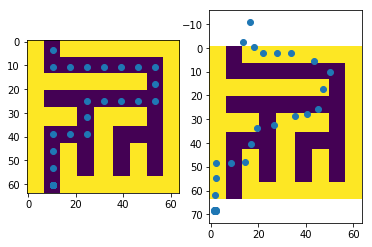

Train Epoch: 24 [79/80 (99%)] EnvLoss: 0.027534  RMSELoss: 6.143320 TotalLoss: 6.170852


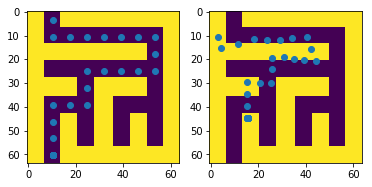

Train Epoch: 25 [79/80 (99%)] EnvLoss: 0.028201  RMSELoss: 5.981788 TotalLoss: 6.009990


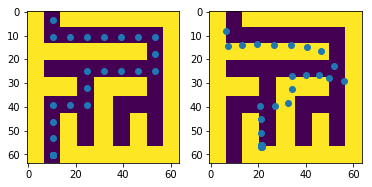

Train Epoch: 26 [79/80 (99%)] EnvLoss: 0.029025  RMSELoss: 6.440955 TotalLoss: 6.469979


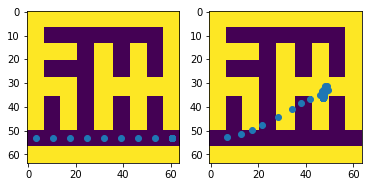

Train Epoch: 27 [79/80 (99%)] EnvLoss: 0.022391  RMSELoss: 6.395868 TotalLoss: 6.418260


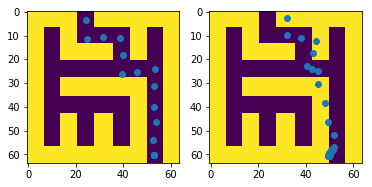

Train Epoch: 28 [79/80 (99%)] EnvLoss: 0.026594  RMSELoss: 6.324095 TotalLoss: 6.350689


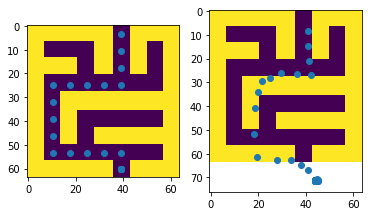

Train Epoch: 29 [79/80 (99%)] EnvLoss: 0.041861  RMSELoss: 5.907931 TotalLoss: 5.949793


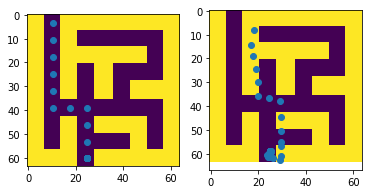

Train Epoch: 30 [79/80 (99%)] EnvLoss: 0.031706  RMSELoss: 6.490870 TotalLoss: 6.522578


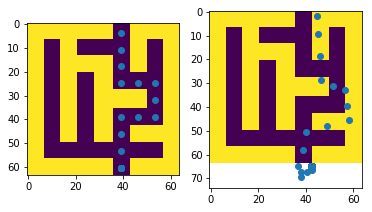

Train Epoch: 31 [79/80 (99%)] EnvLoss: 0.020833  RMSELoss: 6.540875 TotalLoss: 6.561707


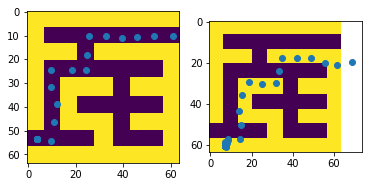

Train Epoch: 32 [79/80 (99%)] EnvLoss: 0.030190  RMSELoss: 5.845662 TotalLoss: 5.875851


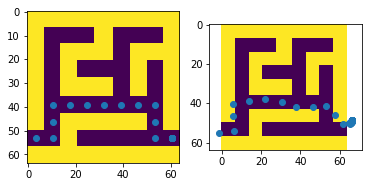

Train Epoch: 33 [79/80 (99%)] EnvLoss: 0.020068  RMSELoss: 5.843550 TotalLoss: 5.863619


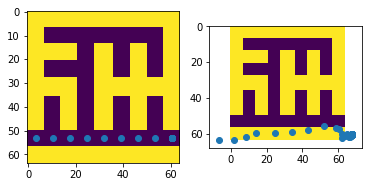

Train Epoch: 34 [79/80 (99%)] EnvLoss: 0.030740  RMSELoss: 5.416808 TotalLoss: 5.447547


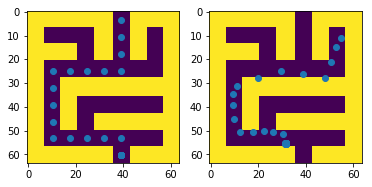

Train Epoch: 35 [79/80 (99%)] EnvLoss: 0.025110  RMSELoss: 5.239580 TotalLoss: 5.264692


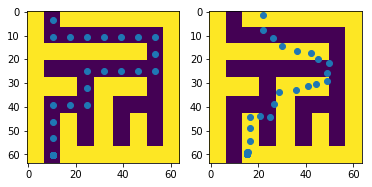

Train Epoch: 36 [79/80 (99%)] EnvLoss: 0.021021  RMSELoss: 5.463938 TotalLoss: 5.484958


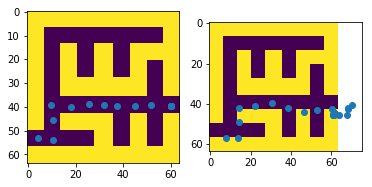

Train Epoch: 37 [79/80 (99%)] EnvLoss: 0.034898  RMSELoss: 5.858241 TotalLoss: 5.893139


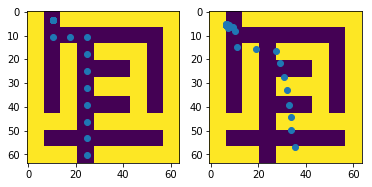

Train Epoch: 38 [79/80 (99%)] EnvLoss: 0.018842  RMSELoss: 4.903315 TotalLoss: 4.922156


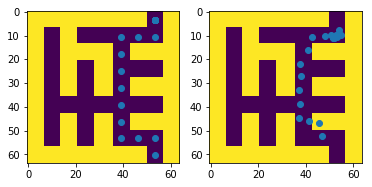

Train Epoch: 39 [79/80 (99%)] EnvLoss: 0.030139  RMSELoss: 5.719195 TotalLoss: 5.749335


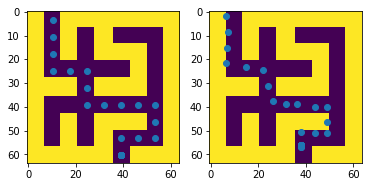

Train Epoch: 40 [79/80 (99%)] EnvLoss: 0.023720  RMSELoss: 4.794929 TotalLoss: 4.818649


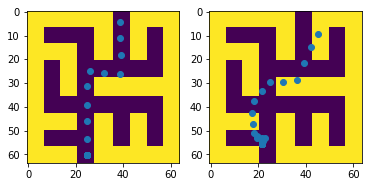

In [ ]:
net.train()
print('Init training loop...')

for epoch in range(1, epochs+1):
    iters = 0.0
    total_env = 0.0
    total_rmse = 0.0

    for batch_idx, (data, target, path, goals, expert_flag) in enumerate(trainloader):
        # Convert X, Y to Torch variables
        grid = data   # save numpy version of maze grid

        # Convert input and target to tensors
        data, target = Variable(data), Variable(target)
        data, target = data.to(device).float(), target.to(device).float()
 
        # Set gradient to zero
        optimizer.zero_grad()

        # Get network output
        output = net(data)

        # RMSE loss
        rmse_loss = rmse(output, target)
        r_loss = road_loss(torch.tensor(grid).reshape(64,64), output.reshape(-1,2).int())

        # Environmental Loss
        grid = grid[0][0].detach().numpy()
        path = path[0].detach().numpy()
        goals = goals[0].detach().numpy()
        output = output[0].detach().cpu().numpy()

        # Reconstruct predicted grids
        pred_grid = torch.tensor(draw_solution_canvas(grid, output)).double().to(device)
        #pred_path = torch.tensor(draw_solution_canvas(path, output)).double().to(device)
        #pred_goals = torch.tensor(draw_goals_canvas(grid, output)).double().to(device)

        # Compute graphic losses
        # Wall loss
        wall_loss = graphic_loss(torch.tensor(grid).to(device), pred_grid)
        # Path planning loss 
        #path_loss = graphic_loss(torch.tensor(path).to(device), pred_path)
        #path_loss = abs(wall_loss-path_loss)
        # Goals loss
        #goal_loss = graphic_loss(torch.tensor(goals).to(device), pred_goals)
        # Non-expert trajectory loss
        #env_loss = Variable((wall_loss + path_loss), requires_grad=True)/20 #
        
        # Final loss
        loss = rmse_loss + r_loss #+ Variable(wall_loss) #env_loss
        
        env_loss = r_loss #Variable(wall_loss)
    
        # Backpropagate loss & udpate gradient
        loss.backward()
        optimizer.step()

        # Print information
        iters += loss
        total_env += env_loss
        total_rmse+= rmse_loss

        print('Train Epoch: {} [{}/{} ({:.0f}%)] EnvLoss: {:.6f}  RMSELoss: {:.6f} TotalLoss: {:.6f}'.format(
                    epoch, batch_idx, len(trainloader.dataset),
                    100. * (batch_idx) / len(trainloader), 
                    total_env/len(trainloader), 
                    total_rmse/len(trainloader),
                    iters/len(trainloader)
                    ), 
                    end='\r', flush=True)
    print("")                                 
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(grid)
    ax[0].scatter(target[0][:,1], target[0][:,0])

    ax[1].imshow(grid)   
    ax[1].scatter(output[:,1], output[:,0])

    plt.show()


In [ ]:
#output
#plt.imshow(data.reshape(64,64))

In [ ]:
#output.reshape(-1,2)

In [ ]:

for i, (data, target, path, goals, expert_flag) in enumerate(testloader):
    # Convert input and target to tensors
    data, target = Variable(data), Variable(target)
    data, target = data.to(device).float(), target.to(device).float()
    # Get network output
    output = net(data)

    # RMSE loss
    rmse_loss = rmse(output, target)
    print(rmse_loss)
    
    #print(i)
    if i == 19:
        break


In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())

In [ ]:
plt.imshow(data[0][0])#output[:,:].detach().numpy())
plt.scatter(output[:,:,1].detach().numpy(), output[:,:,0].detach().numpy())